<a href="https://colab.research.google.com/github/karentp/ProbabilisticModelsProjects/blob/main/Proyecto4A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

Primer semestre del 2022

---

* Estudiantes: **María Sánchez González, Karol Sánchez Cuadra**
* Carnés: **B77079, B97236**
* Grupo: **2**

---
# `P4` - *Modulación digital IQ*

> La modulación digital en los sistemas de comunicación es una aplicación importante del análisis de procesos aleatorios. Este proyecto presenta una introdución a tópicos fundamentales de la ingeniería de comunicaciones para simular un sistema de transmisión de imágenes de baja resolución.

---

---
## 4. - Asignaciones del proyecto

### 4.1. - Modulación QPSK

* (40%) Realice una simulación del sistema de comunicaciones como en la sección 3.2., pero utilizando una modulación **QPSK** en lugar de una modulación BPSK. Deben mostrarse las imágenes enviadas y recuperadas y las formas de onda.

211464 422928
Duración de la simulación:  6.271066904067993
0 errores, para un BER de 0.0000.


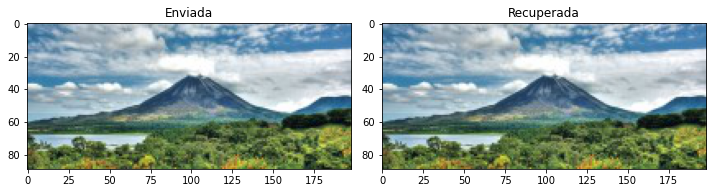

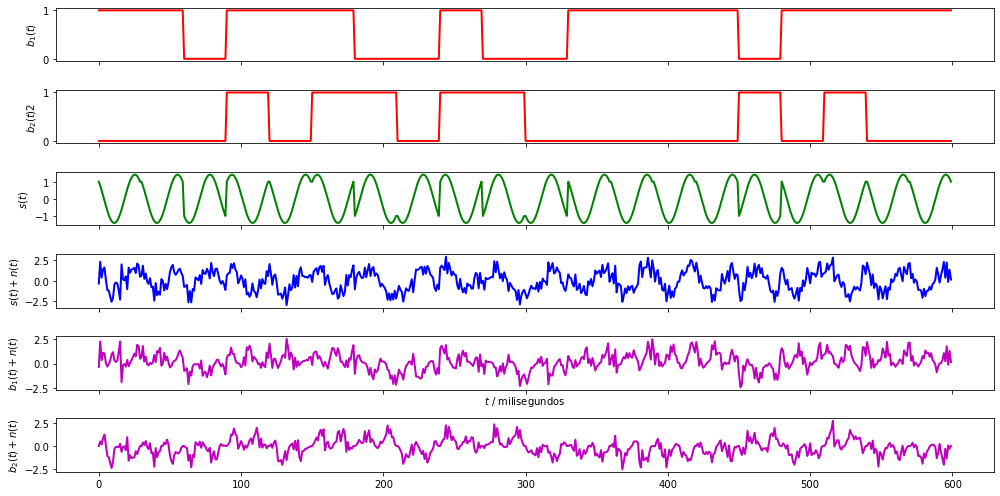

In [ ]:
# 4.1
# Se agregan las bibliotecas necesarias
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time

# Se copian las funciones necesarias dadas


def fuente_info(imagen):
    '''Una función que simula una fuente de
    información al importar una imagen y
    retornar un vector de NumPy con las
    dimensiones de la imagen, incluidos los
    canales RGB: alto x largo x 3 canales

    :param imagen: Una imagen en formato JPG
    :return: un vector de pixeles
    '''
    img = Image.open(imagen)

    return np.array(img)


def rgb_a_bits(array_imagen):
    '''Convierte los pixeles de base
    decimal (de 0 a 255) a binaria
    (de 00000000 a 11111111).

    :param imagen: array de una imagen
    :return: Un vector de (1 x k) bits 'int'
    '''
    # Obtener las dimensiones de la imagen
    x, y, z = array_imagen.shape

    # Número total de elementos (pixeles x canales)
    n_elementos = x * y * z

    # Convertir la imagen a un vector unidimensional de n_elementos
    pixeles = np.reshape(array_imagen, n_elementos)

    # Convertir los canales a base 2
    bits = [format(pixel, '08b') for pixel in pixeles]
    bits_Rx = np.array(list(''.join(bits)))

    return bits_Rx.astype(int)

# Se hace el modulador con forma QPSK


def modulador(bits, fc, mpp):
    '''Un método que simula el esquema de
    modulación digital QPSK.

    :param bits: Vector bidimensional de bits
    :param fc: Frecuencia de la portadora en Hz
    :param mpp: Cantidad de "muestras por periodo" de onda portadora
    :return: Un vector con la señal modulada
    :return: Un valor con la potencia promedio [W]
    :return: La onda portadora c(t)
    :return: La onda cuadrada moduladora (información)
    '''
    # 1. Parámetros de la 'señal' de información (bits)
    N = len(bits)  # Cantidad de bits

    # 2. Construyendo un periodo de la señal portadora c(t)
    Tc = 1 / fc  # periodo [s]
    t_periodo = np.linspace(0, Tc, mpp)  # mpp: muestras por período
    portadora1 = np.cos(2*np.pi*fc*t_periodo)
    portadora2 = np.sin(2*np.pi*fc*t_periodo)

    # 3. Inicializar la señal modulada s(t)
    t_simulacion = np.linspace(0, N*Tc, N*mpp)
    senal_Tx = np.zeros(t_simulacion.shape)
    moduladora1 = np.zeros(t_simulacion.shape)  # señal de bits
    moduladora2 = np.zeros(t_simulacion.shape)  # señal de bits

    # 4. Asignar las formas de onda según los bits (QPSK)
    bits2 = [[bits[i], bits[i+1]] for i in range(0, len(bits), 2)]
    print(len(bits2), len(bits))  # Comparamos el tama;o
    for i, bit in enumerate(bits2):  # Asignamos las formas segun QPSK
        if bit[0] == 1:
            if bit[1] == 1:
                senal_Tx[i*mpp:(i+1)*mpp] = portadora1+portadora2
                moduladora1[i*mpp:(i+1)*mpp] = 1
                moduladora2[i*mpp:(i+1)*mpp] = 1
            else:
                senal_Tx[i*mpp:(i+1)*mpp] = portadora1-portadora2
                moduladora1[i*mpp:(i+1)*mpp] = 1
                moduladora2[i*mpp:(i+1)*mpp] = 0
        else:
            if bit[1] == 1:
                senal_Tx[i*mpp:(i+1)*mpp] = -portadora1+portadora2
                moduladora1[i*mpp:(i+1)*mpp] = 0
                moduladora2[i*mpp:(i+1)*mpp] = 1
            else:
                senal_Tx[i*mpp:(i+1)*mpp] = -portadora1-portadora2
                moduladora1[i*mpp:(i+1)*mpp] = 0
                moduladora2[i*mpp:(i+1)*mpp] = 0

    # 5. Calcular la potencia promedio de la señal modulada
    P_senal_Tx = (1 / (N*Tc)) * np.trapz(pow(senal_Tx, 2), t_simulacion)

    return senal_Tx, P_senal_Tx, [portadora1,
                                  portadora2], [moduladora1, moduladora2]

# Canal AWGN


def canal_ruidoso(senal_Tx, Pm, SNR):
    '''Un bloque que simula un medio de trans-
    misión no ideal (ruidoso) empleando ruido
    AWGN. Recibe un vector con la señal prove-
    niente de un modulador y un valor en dB
    para la relación señal a ruido.

    :param senal_Tx: El vector del modulador
    :param Pm: Potencia de la señal modulada
    :param SNR: Relación señal-a-ruido en dB
    :return: La señal modulada "ruidosa" al dejar el canal
    '''
    # Potencia del ruido generado por el canal
    Pn = Pm / pow(10, SNR/10)

    # Generando ruido auditivo blanco gaussiano (potencia = varianza)
    ruido = np.random.normal(0, np.sqrt(Pn), senal_Tx.shape)

    # Señal distorsionada por el canal ruidoso
    senal_Rx = senal_Tx + ruido

    return senal_Rx

# Demodulación

# Se define la función "demodulador"


def demodulador(senal_Rx, portadora, mpp):
    '''Un método que simula un bloque demodulador
    de señales, bajo un esquema QPSK. El criterio
    de demodulación se basa en decodificación por
    detección de energía.

    :param senal_Rx: La señal recibida del canal
    :param portadora: La onda portadora c(t)
    :param mpp: Número de muestras por periodo
    :return: Los bits de la señal demodulada
    '''
    # Cantidad de muestras en senal_Rx
    M = len(senal_Rx)

    # Cantidad de bits (símbolos) en transmisión
    N = int(M / mpp)

    # Vector para bits obtenidos por la demodulación
    bits_Rx1 = np.zeros(N)
    bits_Rx2 = np.zeros(N)

    # Vector para la señal demodulada
    senal_demodulada1 = np.zeros(senal_Rx.shape)
    senal_demodulada2 = np.zeros(senal_Rx.shape)

    # Pseudo-energía de un período de la portadora
    # Es = np.sum(portadora * portadora)

    # Demodulación
    for i in range(N):
        # Producto interno de dos funciones
        producto1 = senal_Rx[i*mpp:(i+1)*mpp] * portadora[0]
        Ep1 = np.sum(producto1)
        senal_demodulada1[i*mpp:(i+1)*mpp] = producto1

        producto2 = senal_Rx[i*mpp:(i+1)*mpp] * portadora[1]
        Ep2 = np.sum(producto2)
        senal_demodulada2[i*mpp:(i+1)*mpp] = producto2

        # Criterio de decisión por detección de energía
        if Ep1 > 0:
            bits_Rx1[i] = 1
        else:
            bits_Rx1[i] = 0
        if Ep2 > 0:
            bits_Rx2[i] = 1
        else:
            bits_Rx2[i] = 0
    bits_Rx = np.zeros(N)
    j = 0

    # Se vuelven a acomodar los bits en el orden apropiado.
    for i in range(N):
        if i % 2 == 0:
            bits_Rx[i] = bits_Rx1[j]
        else:
            bits_Rx[i] = bits_Rx2[j]
            j += 1
    return bits_Rx.astype(int), [senal_demodulada1, senal_demodulada2]

# Reconstrucción de la imagen


def bits_a_rgb(bits_Rx, dimensiones):
    '''Un blque que decodifica el los bits
    recuperados en el proceso de demodulación

    :param: Un vector de bits 1 x k
    :param dimensiones: Tupla con dimensiones de la img.
    :return: Un array con los pixeles reconstruidos
    '''
    # Cantidad de bits
    N = len(bits_Rx)

    # Se reconstruyen los canales RGB
    bits = np.split(bits_Rx, N / 8)

    # Se decofican los canales:
    canales = [int(''.join(map(str, canal)), 2) for canal in bits]
    pixeles = np.reshape(canales, dimensiones)

    return pixeles.astype(np.uint8)

# Simulación

# Parámetros
fc = 10000  # frecuencia de la portadora
mpp = 30   # muestras por periodo de la portadora
SNR = 0   # relación señal-a-ruido del canal

# Iniciar medición del tiempo de simulación
inicio = time.time()

# 1. Importar y convertir la imagen a trasmitir
imagen_Tx = fuente_info('arenal.jpg')
dimensiones = imagen_Tx.shape

# 2. Codificar los pixeles de la imagen
bits_Tx = rgb_a_bits(imagen_Tx)

# 3. Modular la cadena de bits usando el esquema BPSK
senal_Tx, Pm, portadora, moduladora = modulador(bits_Tx, fc, mpp)

# 4. Se transmite la señal modulada, por un canal ruidoso
senal_Rx = canal_ruidoso(senal_Tx, Pm, SNR)

# 5. Se desmodula la señal recibida del canal
bits_Rx, senal_demodulada = demodulador(senal_Rx, portadora, mpp)

# 6. Se visualiza la imagen recibida
imagen_Rx = bits_a_rgb(bits_Rx, dimensiones)
Fig = plt.figure(figsize=(10, 6))

# Cálculo del tiempo de simulación
print('Duración de la simulación: ', time.time() - inicio)

# 7. Calcular número de errores
errores = sum(abs(bits_Tx - bits_Rx))
BER = errores/len(bits_Tx)
print('{} errores, para un BER de {:0.4f}.'.format(errores, BER))

# Mostrar imagen transmitida
ax = Fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(imagen_Tx)
ax.set_title('Enviada')

# Mostrar imagen recuperada
ax = Fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(imagen_Rx)
ax.set_title('Recuperada')
Fig.tight_layout()
plt.imshow(imagen_Rx)

# Visualizar el cambio entre las señales
fig, (ax1, ax2, ax3, ax4, ax5,
      ax6) = plt.subplots(nrows=6, sharex=True, figsize=(14, 7))

# La onda cuadrada moduladora (bits de entrada)
ax1.plot(moduladora[0][0:600], color='r', lw=2)
ax1.set_ylabel('$b_1(t)$')

# La onda cuadrada moduladora
ax2.plot(moduladora[1][0:600], color='r', lw=2)
ax2.set_ylabel('$b_2(t)2$')

# La señal modulada por BPSK
ax3.plot(senal_Tx[0:600], color='g', lw=2)
ax3.set_ylabel('$s(t)$')

# La señal modulada al dejar el canal
ax4.plot(senal_Rx[0:600], color='b', lw=2)
ax4.set_ylabel('$s(t) + n(t)$')

# La señal demodulada
ax5.plot(senal_demodulada[0][0:600], color='m', lw=2)
ax5.set_ylabel('$b_1(t) + n(t)$')

ax6.plot(senal_demodulada[1][0:600], color='m', lw=2)
ax6.set_ylabel('$b_2(t) + n(t)$')
ax5.set_xlabel('$t$ / milisegundos')
fig.tight_layout()
plt.show()

### 4.2. - Estacionaridad y ergodicidad

* (20%) Realice pruebas de estacionaridad y ergodicidad a la señal modulada `senal_Tx` y obtenga conclusiones sobre estas.

### 4.3. - Autocorrelación y autocovarianza

* (20%) Realice pruebas de autocorrelación y autocovarianza a la señal modulada `senal_Tx` y obtenga conclusiones sobre estas.

In [ ]:
#Autocovarianza
array = np.array(senal_Tx)
cov = np.cov(array, array)[0][1]
covarianza = round(cov, 5)

print('La autocovarianza de senal_Tx es de', covarianza, ', lo cual indica que en la cadena de bits modulada,',
      'la variabilidad conjunta entre las variables aleatorias es constante en ese valor, independientemente del',
      'tiempo en que se mida.')

La autocovarianza de senal_Tx es de 0.5 , lo cual indica que en la cadena de bits modulada, la variabilidad conjunta entre las variables aleatorias es constante en ese valor, independientemente del tiempo en que se mida.


### 4.4. - Densidad espectral de potencia

* (20%) Determine y grafique la densidad espectral de potencia para la señal modulada `senal_Tx`.

\begin{equation}
\displaystyle
\mathcal{S}_{XX}(\omega) = \lim_{T \rightarrow \infty}\frac{E[\vert X_{T}(\omega) \vert^2]}{2T}
\end{equation}

Densidad espectral de potencia para la señal modulada

[1.79077924e+08 6.29199661e+08 5.79908018e+08 ... 2.01801535e+05
 2.62391825e+05 4.70152384e+05]


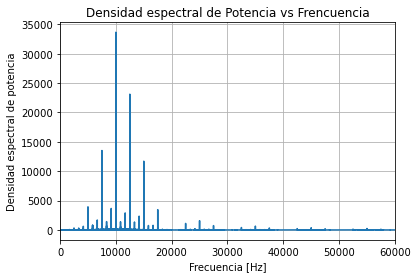

In [ ]:
#Se debe encontrar la transformada de Fourier
from scipy import fft

senal_f = fft.fft(senal_Tx)

#Se obtiene la cantidad de muestras
M = len(senal_Tx)

#El número de símbolos se obtiene de la cantidad de muestras por período
S = M//mpp

#El tiempo del símbolo es el período de la onda portadora
Ts = 1/fc

#El tiempo de muestreo es el tiempo del símbolo entre la cantidad de muestras por período
Tm = Ts/mpp

#El tiempo de simulación es el número de símbolos por su tiempo
T = M*Ts

#El espacio de frecuencias se obtiene de la mitad del período de muestreo
f = np.linspace(0.0, 1.0/(2.0*Tm), M//2)

#La función a graficar es el cuadrado del valor absoluto de la transformada de Fourier 
Sxx = np.power(np.abs(senal_f[0:M//2]), 2)

# Densidad espectral de potencia
print('Densidad espectral de potencia para la señal modulada\n')
print(Sxx)

#se grafica
plt.plot(f, 2.0/M *Sxx)
plt.xlim(0,60000)
plt.title('Densidad espectral de Potencia vs Frencuencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.grid()

#### Entrega de resultados

Crear un *notebook* nuevo de Jupyter y exportar como HTML.

---
**Universidad de Costa Rica** | Facultad de Ingeniería | Escuela de Ingeniería Eléctrica

&copy; 2022

---